In [ ]:
## Scrape several products from amazon

In [30]:
# import useful packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.5 Safari/605.1.15'}

In [31]:
# create a list to store soap sheet dispenser products' url
dispenser = ['https://www.amazon.com/KISEER-Portable-Disposable-Washing-Scented/dp/B07V5YQ1Z5/ref=sr_1_3?crid=3V2SUXNNKEC9J&dchild=1&keywords=hand+soap+sheet+dispenser&qid=1600096801&sprefix=hand+soap+sheet+dis%2Caps%2C141&sr=8-3',
             'https://www.amazon.com/Portable-Disposable-Travel-Washing-Toiletry/dp/B077NDQ58Q/ref=sr_1_4?crid=3V2SUXNNKEC9J&dchild=1&keywords=hand+soap+sheet+dispenser&qid=1600096801&sprefix=hand+soap+sheet+dis%2Caps%2C141&sr=8-4',
             'https://www.amazon.com/Portable-Disposable-Outdoor-Camping-Washing/dp/B085VSXT8Y/ref=sr_1_5?crid=3V2SUXNNKEC9J&dchild=1&keywords=hand+soap+sheet+dispenser&qid=1600096801&sprefix=hand+soap+sheet+dis%2Caps%2C141&sr=8-5',
             'https://www.amazon.com/ZDU-Outdoor-Washing-Portable-Camping/dp/B085VZ7B8X/ref=sr_1_6?crid=3V2SUXNNKEC9J&dchild=1&keywords=hand+soap+sheet+dispenser&qid=1600096801&sprefix=hand+soap+sheet+dis%2Caps%2C141&sr=8-6',
             'https://www.amazon.com/Portable-Disposable-Washing-Toiletry-Bathing/dp/B0865ZSF8M/ref=sr_1_8?crid=3V2SUXNNKEC9J&dchild=1&keywords=hand+soap+sheet+dispenser&qid=1600096801&sprefix=hand+soap+sheet+dis%2Caps%2C141&sr=8-8',
             'https://www.amazon.com/Ellocy-Portable-Disposable-Outdoor-activities/dp/B085KSQBQN/ref=sr_1_9?crid=3V2SUXNNKEC9J&dchild=1&keywords=hand+soap+sheet+dispenser&qid=1600096801&sprefix=hand+soap+sheet+dis%2Caps%2C141&sr=8-9',
             'https://www.amazon.com/Portable-Disposable-Washing-Scented-Toiletry/dp/B085VJ3GX7/ref=sr_1_10?crid=3V2SUXNNKEC9J&dchild=1&keywords=hand+soap+sheet+dispenser&qid=1600096801&sprefix=hand+soap+sheet+dis%2Caps%2C141&sr=8-10',
             'https://www.amazon.com/Bamsod-Portable-Disposal-Scented-Confetti/dp/B07Z19PNY6/ref=sr_1_11?crid=3V2SUXNNKEC9J&dchild=1&keywords=hand+soap+sheet+dispenser&qid=1600096801&sprefix=hand+soap+sheet+dis%2Caps%2C141&sr=8-11',
             'https://www.amazon.com/Travelon-Hand-Toiletry-Sheets-50-Count/dp/B001CGOPZM/ref=sr_1_14?crid=3V2SUXNNKEC9J&dchild=1&keywords=hand+soap+sheet+dispenser&qid=1600096801&sprefix=hand+soap+sheet+dis%2Caps%2C141&sr=8-14',
             'https://www.amazon.com/Portable-Paper-Hand-Soap-Sheets/dp/B0871M49T8/ref=sr_1_17?crid=3V2SUXNNKEC9J&dchild=1&keywords=hand+soap+sheet+dispenser&qid=1600096801&sprefix=hand+soap+sheet+dis%2Caps%2C141&sr=8-17',
             'https://www.amazon.com/Washing-Portable-Replaceable-Outdoor-Camping/dp/B0892SMXSD/ref=sr_1_28?crid=3V2SUXNNKEC9J&dchild=1&keywords=hand+soap+sheet+dispenser&qid=1600096801&sprefix=hand+soap+sheet+dis%2Caps%2C141&sr=8-28',
             'https://www.amazon.com/Fomin-3-Pack-Sheets-Foaming-Hand/dp/B08BJL9B9C/ref=psdc_11062271_t2_B07V5YQ1Z5',
             'https://www.amazon.com/dp/B086G3R7F6/ref=sspa_dk_detail_5?psc=1&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUEyQkZKNVFTU0pYNFgmZW5jcnlwdGVkSWQ9QTA5NDA4MTkzNlo1REZFQUFKMDVZJmVuY3J5cHRlZEFkSWQ9QTAzNjAwNDIzQllVUElRTFlVMFJFJndpZGdldE5hbWU9c3BfZGV0YWlsMiZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU=',
             'https://www.amazon.com/dp/B08BNMS45G/ref=sspa_dk_detail_1?psc=1&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUEyQkZKNVFTU0pYNFgmZW5jcnlwdGVkSWQ9QTA5NDA4MTkzNlo1REZFQUFKMDVZJmVuY3J5cHRlZEFkSWQ9QTAzMjUxNjcxWFlIN1FETlRRV0RIJndpZGdldE5hbWU9c3BfZGV0YWlsMiZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU='
            ]

In [32]:
# setting up the chrome driver
driver = webdriver.Chrome('/Users/guopinjie/Downloads/chromedriver')

In [33]:
# function for getting reviews for one product
def get_reviews(review_url,dict_):
    reviews = []
    driver.get(review_url)
    time.sleep(5)
    while True:
        review_list = driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']")
        for review in review_list:
            review_dict = {}
            review_dict['name'] = dict_['name']
            date = ' '.join(review.find_elements_by_xpath(".//div[@class='a-section celwidget']/span")[-1].text.split(' ')[-3:])
            from datetime import datetime
            review_dict['date'] = datetime.strptime(date, '%B %d, %Y')
            try:
                review_dict['rating'] = float(review.find_elements_by_xpath(".//div[@class='a-row']/a[@class='a-link-normal']")[0].get_attribute('title').split(' ')[0])
            except:
                pass
            text_title = review.find_elements_by_xpath(".//div[@class='a-row']")[0].text
            text_content = review.find_elements_by_xpath(".//div[@class='a-row a-spacing-small review-data']/span")[0].text
            try:
                review_dict['text'] = text_title + ' ' + text_content
            except:
                review_dict['text'] = text_content
            reviews.append(review_dict)
        else:
            try:
                driver.find_elements_by_xpath(".//li[@class='a-last']")[0].click()
                time.sleep(5)
            except:
                break
    return reviews

In [34]:
def get_info(product_url):
    # get the basic info for the product
    driver.get(url)
    dict_ = dict()
    dict_['name'] = driver.find_elements_by_xpath("//span[@id='productTitle']")[0].text.strip()
    dict_['url'] = product_url
    try:
        dict_['price'] = float(driver.find_elements_by_xpath("//span[@id='priceblock_ourprice']")[0].text.split('$')[1])
    except:
        pass
    try:
        dict_['info'] = driver.find_elements_by_xpath("//ul[@class='a-unordered-list a-vertical a-spacing-mini']")[0].text.strip()
    except:
        pass
    # get the review for the product
    time.sleep(3)
    review_url = driver.find_elements_by_xpath("//a[@class='a-link-emphasis a-text-bold']")[0].get_attribute('href') + '&sortBy=recent&pageNumber=1'
    product_review = get_reviews(review_url,dict_)
    return dict_, product_review

In [35]:
# loop through the url for the dispenser products to get the dataframe
product_list = []
reviews = []
for url in dispenser:
    dict_, product_review = get_info(url)
    product_list.append(dict_)
    reviews.extend(product_review)

In [37]:
product_df = pd.DataFrame(product_list)

In [38]:
product_df

,name,url,price,info
0,KISEER 4 Boxs (200 Sheets) Mini Portable Trave...,https://www.amazon.com/KISEER-Portable-Disposa...,9.99,Made of natural premium quality biodegradable ...
1,6 Packs Portable Disposable Travel Hiking Wash...,https://www.amazon.com/Portable-Disposable-Tra...,7.99,"Package Included: 6 Box of Soap Sheets,20pcs p..."
2,"4 Boxs(200 Sheets) Paper Soap,Mini Portable Tr...",https://www.amazon.com/Portable-Disposable-Out...,6.99,♥1: MATERIAL: Made of natural premium quality ...
3,ZDU 80 Pcs Outdoor Travel Hand Washing Soap Pa...,https://www.amazon.com/ZDU-Outdoor-Washing-Por...,5.99,"Pocket Size - Soap piece size: 6 x 3.5cm, box ..."
4,6 Boxes (300 Sheets) Portable Disposable Soap ...,https://www.amazon.com/Portable-Disposable-Was...,11.72,Package Included: 6 Boxes (300 Sheets) x Porta...
5,Ellocy 4 Boxes(200 Sheets) Mini Cute Portable ...,https://www.amazon.com/Ellocy-Portable-Disposa...,8.99,✅ High-quality : Made of natural premium quali...
6,2 Box (40 Sheets) Portable Disposable Soap Pap...,https://www.amazon.com/Portable-Disposable-Was...,5.99,Specifications: 2 boxes (40 sheets) portable d...
7,Bamsod 12 Boxes (240 sheets) Soap Sheets Porta...,https://www.amazon.com/Bamsod-Portable-Disposa...,8.99,"✡Material: Natural Vegetable Oils, Aromatherap..."
8,"Travelon Hand Soap Toiletry Sheets, 50-Count",https://www.amazon.com/Travelon-Hand-Toiletry-...,4.60,Dissolves in water\n50 Biodegradable Sheets\n3...
9,Portable Paper Hand Soap Sheets - Travel Size ...,https://www.amazon.com/Portable-Paper-Hand-Soa...,7.99,TAKE IT ANYWHERE: Say goodbye to the disappoin...


In [42]:
product_df.to_csv('hand_wash_sheet_dispenser.csv')

In [69]:
reviews_df = pd.DataFrame(reviews)

In [70]:
reviews_df

,name,date,rating,text
0,KISEER 4 Boxs (200 Sheets) Mini Portable Trave...,2020-09-12,5.0,"Useful, especially if you are hiking or travel..."
1,KISEER 4 Boxs (200 Sheets) Mini Portable Trave...,2020-09-11,2.0,Not what I expected These were not at all what...
2,KISEER 4 Boxs (200 Sheets) Mini Portable Trave...,2020-09-10,1.0,Didn’t get what I paid for. Great idea however...
3,KISEER 4 Boxs (200 Sheets) Mini Portable Trave...,2020-09-10,5.0,Bought twice! Liked 1st order so much ordered ...
4,KISEER 4 Boxs (200 Sheets) Mini Portable Trave...,2020-09-09,5.0,"Grab with dry hand Easy to carry, grab the pie..."
...,...,...,...,...
2872,200pcs Portable Travel Hand Washing Paper Soap...,2020-07-23,5.0,Perfect for camping! My Family recently went c...
2873,200pcs Portable Travel Hand Washing Paper Soap...,2020-07-20,5.0,Recommend. Great for travel Great for travel a...
2874,200pcs Portable Travel Hand Washing Paper Soap...,2020-07-19,5.0,Love it I love the scent of all of them. Bough...
2875,200pcs Portable Travel Hand Washing Paper Soap...,2020-07-18,5.0,No sink no problem I love this. It’s perfect f...


In [75]:
# remove duplicated reviews
reviews_df = reviews_df.drop_duplicates()

In [77]:
# reset index
reviews_df.reset_index(inplace=True,drop=True)

In [78]:
reviews_df

,name,date,rating,text
0,KISEER 4 Boxs (200 Sheets) Mini Portable Trave...,2020-09-12,5.0,"Useful, especially if you are hiking or travel..."
1,KISEER 4 Boxs (200 Sheets) Mini Portable Trave...,2020-09-11,2.0,Not what I expected These were not at all what...
2,KISEER 4 Boxs (200 Sheets) Mini Portable Trave...,2020-09-10,1.0,Didn’t get what I paid for. Great idea however...
3,KISEER 4 Boxs (200 Sheets) Mini Portable Trave...,2020-09-10,5.0,Bought twice! Liked 1st order so much ordered ...
4,KISEER 4 Boxs (200 Sheets) Mini Portable Trave...,2020-09-09,5.0,"Grab with dry hand Easy to carry, grab the pie..."
...,...,...,...,...
872,200pcs Portable Travel Hand Washing Paper Soap...,2020-07-23,5.0,Perfect for camping! My Family recently went c...
873,200pcs Portable Travel Hand Washing Paper Soap...,2020-07-20,5.0,Recommend. Great for travel Great for travel a...
874,200pcs Portable Travel Hand Washing Paper Soap...,2020-07-19,5.0,Love it I love the scent of all of them. Bough...
875,200pcs Portable Travel Hand Washing Paper Soap...,2020-07-18,5.0,No sink no problem I love this. It’s perfect f...


In [79]:
reviews_df.to_csv('hand_wash_sheet_dispenser_review.csv')

In [80]:
# create keyword list to help find packaging related review
keywords = ['case', 'container', 'packages', 'package', 'packaging']

In [81]:
# convert the review_text into a list
review_text = list(reviews_df['text'])

In [82]:
review_text

['Useful, especially if you are hiking or traveling When I go abroad I realize that not all bathrooms have soap dispensers and so this was a great buy. What I noticed is that once you open the container with the films or strips of soap it doesn’t close but it doesn’t necessarily affect her quality of the product',
 'Not what I expected These were not at all what I expected them to be. I was hoping they smelled better than they did. I actually purchased the water soluble paper to create my own and they are great.',
 'Didn’t get what I paid for. Great idea however i only received two instead of four. Felt ripped off.',
 'Bought twice! Liked 1st order so much ordered again! You need to get your hands wet first as much as possible but after that they work great!',
 'Grab with dry hand Easy to carry, grab the piece before your hands are wet.',
 "FABULOUS! Just got these delivered. I'm preparing to go back to school for work and wanted my own portable hand soap to use. These soap sheets are 

In [100]:
# Draw noun chunk bubble chart
# remove confusing words
delete_words = ['soap','hand','use','’','packag','sheet','great','case','one','good','product','like','contain','wash','love','smell','scent','go','nice','public','little','soaps','sheets','water','wet']
import spacy
# set up nlp environment in spacy
nlp = spacy.load("en_core_web_sm")
# use spacy to identify each chunk in the review before covid and put them into the chunk list
chunk_list = []
for text in package_text:
    doc = nlp(text.lower())
    for chunk in doc.noun_chunks:
        chunk = ' '.join([word for word in str(chunk.text).split() if word not in STOPWORDS])
        if not (len(chunk.split(' ')) == 0 or len(chunk.split(' ')) == 1):
            chunk_list.append(chunk)
# create chunk dict to record each chunk's appearence time
chunk_dict = dict()
for i in chunk_list:
    if not set.intersection(set(i.lower().split(' ')), set(delete_words)):
        if chunk_dict.get(i):
            chunk_dict[i] += 1
        else:
            chunk_dict[i] = 1
# sort chunk dict based on the value
sort_list = sorted(chunk_dict.items(), key=lambda x: x[1], reverse=True)

In [102]:
sort_list

[('cute packaging', 5),
 ('plastic container', 4),
 ('perfect amount', 2),
 ('camping trips', 2),
 ('cute package', 2),
 ('small carrying spaces', 2),
 ('4 containers', 2),
 ('family members', 2),
 ('another set', 2),
 ('entire thing', 2),
 ('clean hands', 2),
 ('different brand', 2),
 ('road trip', 2),
 ('sturdy package', 2),
 ('front line workers', 2),
 ('strong fragrance', 2),
 ('different brands', 2),
 ('fast shipping', 2),
 ('different scents', 2),
 ('learning curve', 2),
 ('entire package', 2),
 ('superior hygiene', 2),
 ('tiny bit', 1),
 ('2 pack', 1),
 ('top lid', 1),
 ('best packaging', 1),
 ('emergency purposes', 1),
 ('small bags', 1),
 ('really long time', 1),
 ('strong scents', 1),
 ('care package', 1),
 ('silicon type container', 1),
 ('hard cheap plastic', 1),
 ('slight squeeze', 1),
 ('front part', 1),
 ('travel size', 1),
 ('shipping box', 1),
 ('refill pack', 1),
 ('cheap side', 1),
 ('different looks', 1),
 ('covid gas stations', 1),
 ('perfect packaging', 1),
 ('rea

In [101]:
# draw bubble chart for the most ten frequency chunks
import plotly.graph_objects as go
x_data = list(range(10))
y_data = list(zip(*sort_list))[1][:10]
z_data = list(zip(*sort_list))[0][:10]
annotations = [
    dict(
        x=x_data[i], 
        y=y_data[i],
        text=z_data[i], # Some conditional to define outliers
        showarrow=False,
        xanchor='center',  # Position of text relative to x axis (left/right/center)
        yanchor='top' if i%2 else 'bottom',  # Position of text relative to y axis (top/bottom/middle)
    ) for i in range(10)
]
trace0 = go.Scatter(
    x=x_data,
    y=y_data,
    mode='markers',
    marker=dict(
        size=[i for i in y_data],
    )
)

data = [trace0]
layout = go.Layout(annotations=annotations)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [104]:
from nltk import sent_tokenize
# join the reviews in the list together to a string
package_str = ' '.join(package_text)
# keep the sentence if it contains keyword
keywords = ['case', 'container', 'packages', 'package', 'packaging']
package_sent = sent_tokenize(package_str)
from nltk import word_tokenize
list_ = []
for sent in package_sent:
    for keyword in keywords:
        if keyword in word_tokenize(sent):
            list_.append(sent)
            break
        else:
            continue

In [105]:
list_

['What I noticed is that once you open the container with the films or strips of soap it doesn’t close but it doesn’t necessarily affect her quality of the product MUST BUY!!!',
 "There is a very light scent when you open the package but it doesn't stay on your hands.",
 "This is definitely come in handy at festivals, camping trips, or just to have in case wherever you go doesn't have soap.",
 'The package is very small so fits very well in my pocket and has plenty in there.',
 'I wish the package was more sturdy but still works bad The smell is very strong.',
 'I have discarded it and the package is not good when it is delivered.',
 'I keep one in my bag in case public bathrooms run out of soap.',
 'Not the best packaging but the product itself is what’s advertised!',
 "I wanted these for emergency purposes in case we ran out of hand sanitizer on the road or got somewhere that didn't have soap.",
 'Come in cute package and easy to carry around your small bags.',
 'So this come in hand

In [106]:
from wordcloud import WordCloud, STOPWORDS 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import string
import matplotlib
from matplotlib import pyplot as plt

# make data preprocessing on the review to remove stop words and change each word to their stem
def preprocess_data(raw_text):
    texts = []
    stop_words = set(stopwords.words('english')) 
    p_stemmer = PorterStemmer()
    for i in raw_text:
        if type(i) == str:
            word_tokens = word_tokenize(i.lower().strip().translate(str.maketrans('', '', string.punctuation)))
            #remove stop words
            stopped_tokens = [i for i in word_tokens if not i in stop_words]
            # change each word to their stem
            stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
            texts.append(stemmed_tokens)
        else:
            continue
    return texts

In [107]:
# function to draw wordcloud
def get_wordcloud(delete_words, text_list):
    # raw text preprocessing
    clean_text = preprocess_data(text_list)
    text = ','.join([','.join(item) for item in clean_text])
    # Remove unwanted words
    for word in delete_words:
        text = text.replace(word,' ')
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=4000,height=4000,max_words=50).generate(text)
    # plot WordCloud
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [108]:
import string

In [111]:
# get the 50 most common words in package text
from collections import Counter
Review = preprocess_data(list_)
Review_list = []
for i in Review:
    Review_list.extend(i)
c = Counter(Review_list)
c.most_common(50)

[('packag', 77),
 ('case', 47),
 ('soap', 40),
 ('contain', 38),
 ('cute', 23),
 ('’', 20),
 ('small', 20),
 ('like', 17),
 ('sheet', 17),
 ('plastic', 16),
 ('use', 16),
 ('come', 13),
 ('good', 13),
 ('littl', 13),
 ('need', 13),
 ('bag', 12),
 ('great', 12),
 ('love', 12),
 ('hand', 11),
 ('travel', 11),
 ('one', 10),
 ('easi', 10),
 ('carri', 10),
 ('purs', 10),
 ('nice', 10),
 ('product', 9),
 ('scent', 9),
 ('go', 9),
 ('pocket', 9),
 ('conveni', 9),
 ('open', 8),
 ('smell', 8),
 ('wash', 8),
 ('close', 7),
 ('paper', 7),
 ('easili', 7),
 ('color', 7),
 ('fit', 6),
 ('keep', 6),
 ('want', 6),
 ('perfect', 6),
 ('hard', 6),
 ('realli', 6),
 ('size', 6),
 ('take', 6),
 ('get', 6),
 ('car', 6),
 ('backpack', 6),
 ('trip', 5),
 ('sturdi', 5)]

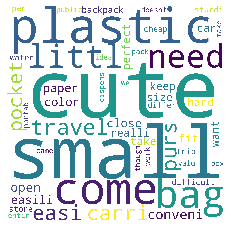

In [112]:
# find the most common confusing words in reviews before covid and put them into delete words list
delete_words = ['soap', 'hand', 'use', '’', 'packag', 'sheet', 'great', 'case', 'one', 'good', 'product', 'like', 'contain', 'wash', 'love','smell','scent','go','nice']
get_wordcloud(delete_words, list_)

In [124]:
# Draw noun chunk bubble chart
# remove confusing words
delete_words = ['soap','hand','use','’','packag','sheet','great','case','one','good','product','like','contain','wash','love','smell','scent','go','nice','public','little','soaps','sheets','water','wet','workers','containers','restrooms','purposes','entire','bag']
import spacy
# set up nlp environment in spacy
nlp = spacy.load("en_core_web_sm")
# use spacy to identify each chunk in the review 
chunk_list = []
for text in list_:
    doc = nlp(text.lower())
    for chunk in doc.noun_chunks:
        chunk = ' '.join([word for word in str(chunk.text).split() if word not in STOPWORDS])
        if not (len(chunk.split(' ')) == 0 or len(chunk.split(' ')) == 1):
            chunk_list.append(chunk)
# create chunk dict to record each chunk's appearence time
chunk_dict = dict()
for i in chunk_list:
    if not set.intersection(set(i.lower().split(' ')), set(delete_words)):
        if chunk_dict.get(i):
            chunk_dict[i] += 1
        else:
            chunk_dict[i] = 1
# sort chunk dict based on the value
sort_list = sorted(chunk_dict.items(), key=lambda x: x[1], reverse=True)

In [125]:
sort_list

[('cute packaging', 5),
 ('plastic container', 4),
 ('camping trips', 2),
 ('cute package', 2),
 ('sturdy package', 2),
 ('best packaging', 1),
 ('small bags', 1),
 ('care package', 1),
 ('silicon type container', 1),
 ('hard cheap plastic', 1),
 ('light weight', 1),
 ('travel size', 1),
 ('cheap side', 1),
 ('different looks', 1),
 ('perfect packaging', 1),
 ('really thin plastic', 1),
 ('"go bags', 1),
 ('- hands', 1),
 ('car packages', 1),
 ('cheap plastic', 1),
 ('growing times', 1),
 ('important hygiene', 1),
 ('cute container', 1),
 ('eady store', 1),
 ('4 daughter', 1),
 ('recent road trip', 1),
 ('rest stop', 1),
 ('small handbags', 1),
 ('simple usage', 1),
 ('3 colors', 1),
 ('convenient packaging', 1),
 ('two 12 box packages', 1),
 ('strong fragrance', 1),
 ('higher quality', 1),
 ('excellent quality', 1),
 ('mission trip', 1),
 ('old mints container', 1),
 ('plastic packaging', 1),
 ('spare bottle', 1),
 ('hiking backpack', 1),
 ('three packages', 1),
 ('fast shipping', 1),

In [126]:
# draw bubble chart for the most ten frequency chunks
import plotly.graph_objects as go
x_data = list(range(10))
y_data = list(zip(*sort_list))[1][:10]
z_data = list(zip(*sort_list))[0][:10]
annotations = [
    dict(
        x=x_data[i], 
        y=y_data[i],
        text=z_data[i], # Some conditional to define outliers
        showarrow=False,
        xanchor='center',  # Position of text relative to x axis (left/right/center)
        yanchor='top' if i%2 else 'bottom',  # Position of text relative to y axis (top/bottom/middle)
    ) for i in range(10)
]
trace0 = go.Scatter(
    x=x_data,
    y=y_data,
    mode='markers',
    marker=dict(
        size=[i for i in y_data],
    )
)

data = [trace0]
layout = go.Layout(annotations=annotations)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [127]:
# conduct sentiment analysis on these reviews
from pattern.en import sentiment
senti = []
for i in range(len(list_)):
    senti.append(sentiment(list_[i])[0])

In [128]:
senti

[0.0,
 0.26,
 0.3,
 -0.0625,
 0.12111111111111117,
 -0.35,
 0.0,
 1.0,
 0.0,
 0.22777777777777777,
 0.7749999999999999,
 -0.22916666666666666,
 0.0,
 1.0,
 0.036111111111111094,
 0.3333333333333333,
 -0.1375,
 -0.12361111111111112,
 0.8,
 0.0,
 0.09449999999999999,
 0.05416666666666667,
 0.0,
 0.5111111111111112,
 0.58,
 0.08611111111111112,
 -0.25,
 -0.375,
 0.07500000000000001,
 0.0,
 0.1328125,
 1.0,
 0.04916666666666667,
 0.4777777777777778,
 0.0,
 0.52,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.12638888888888888,
 0.6,
 0.0,
 -0.15583333333333332,
 0.0,
 0.6,
 0.0,
 0.35,
 0.0,
 0.0,
 0.08333333333333334,
 0.15,
 0.5666666666666668,
 -0.1375,
 0.8,
 0.6,
 0.4,
 0.5,
 0.10625000000000001,
 0.5,
 0.3,
 0.05000000000000001,
 -0.16,
 0.39999999999999997,
 0.4125,
 0.2,
 0.43333333333333335,
 0.5,
 -0.25,
 0.5,
 0.8083333333333332,
 0.0,
 0.15873015873015872,
 0.46406249999999993,
 0.04999999999999999,
 -0.05000000000000001,
 0.0,
 -0.25,
 0.22916666666666666,
 0.21666666666666667,
 0.0,
 0.5,


In [137]:
# draw violin plot for sentiment value of each review
import plotly.express as px
df = pd.DataFrame(senti)
fig = px.violin(df)
fig.show()

In [129]:
min(senti)

-0.375

In [130]:
max(senti)

1.0

In [131]:
# extract high value ones and low value ones to see the pros and cons for the package
# due to min(senti) and max(senti), set low value as [-0.375,-0.175], set high value as [0.8,1.0]
pros = []
cons = []
for i in range(len(senti)):
    if senti[i] >= -0.375 and senti[i] <= -0.175:
        cons.append(list_[i])
    elif senti[i] >= 0.8 and senti[i] <= 1.0:
        pros.append(list_[i])
    else:
        continue

In [132]:
pros

['Not the best packaging but the product itself is what’s advertised!',
 'perfect for travel, suspect restrooms, and just to have for the "in case" situations Great soap for traveling!',
 'Great value for the money as there are 4 containers with 50 sheets per container.',
 'Perfect packaging to just toss in your purse or pocket and go.',
 'Great value for the money as there are 4 containers with 50 sheets per container.',
 "Great It's a good product came in a nice package box it works perfectly I had my 4 daughter try it herself and it works perfect when she was washing her hands Suds up nicely!",
 'The container they come in is sturdy so I don’t have to worry about them spilling inside my bag, and the smell is great!',
 'But in doing so, I discovered that there is a good sized roll in the container!']

In [133]:
cons

['I have discarded it and the package is not good when it is delivered.',
 'Also, the packaging on it is a little difficult to open and close.',
 'Small plastic case.',
 'With a time like this due to coronavirus I threw the entire thing away I didn’t want to risk it after seeing all the gunk around the case NASTY.',
 'The container is small and compact so I can throw it in my purse, car, backpack or pocket.',
 'Small plastic case.',
 'A little upset with the packaging.',
 'Small plastic case.',
 'I like that there is no plastic container for these (less plastic, yeah!)',
 "I also don't love the cardboard packaging.",
 'These tissue sheets are enclosed in a cardboard container and it is going to very difficult to use the entire package before one day you discover the entire box is a hard, wet mess.']